# LOGISTIC REGRESSION
---

For this exercise we are going to use data from the [1984 United States Congressional Voting Records Database] [1]
(take a look at the data dictionary) to predict if a congressmen/women is a republican or democrat 
[1]: http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names "1984 United States Congressional Voting Records Database"

# STEP 0
### IMPORTING THE PACKAGES. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression

# STEP 1 
---
### MAKING A DUMMY DEPENDENT VARIABLE, IF IT IS NOT ALREADY IN 0 OR 1 FORM.

In [ ]:
df['class'] = df['class'].map(lambda value: 0 if value == "republican" else 1 )

##### Here we have variable "class" that is taking values "democrat" and "republican" so we made a binary dummy from it that takes value 0 if republican and 1 if democrat.

##### MAKING A DATAFRAME OF ALL DUMMIES

In [4]:
df_dummies = pd.get_dummies(df)

,class,handicapped_infants_?,handicapped_infants_n,handicapped_infants_y,water_project_cost_?,water_project_cost_n,water_project_cost_y,adoption_of_the_budget_resolution_?,adoption_of_the_budget_resolution_n,adoption_of_the_budget_resolution_y,...,superfund_right_to_sue_y,crime_?,crime_n,crime_y,duty_free_exports_?,duty_free_exports_n,duty_free_exports_y,export_administration_act_south_africa_?,export_administration_act_south_africa_n,export_administration_act_south_africa_y
0,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,1,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0


##### Here we made a new dataframe that contains all dummies based on values in original dataframe. This command automatically creates dummies for each variable.

# STEP 2
---
### DEFINING THE DEPENDENT AND INDEPENDENT VARIABLE(S)

In [6]:
y = df_dummies['class'] 
columns_ = df_dummies.columns.tolist()
exclude_col = ['class']

X = df_dummies[[i for i in columns_ if i not in exclude_col]]

print X.shape, y.shape

(435, 48) (435L,)


##### Here we are including all the variables from the dataframe as possible independent variables, so we are excluding only our depependent variable from x.

# STEP 3
---
### SPLITTING THE DATA ON TRAIN AND TEST SAMPLE

In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(304, 48) (304L,)
(131, 48) (131L,)


C:\Users\Boris\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Here we splitted the sample on train and test in 70:30 proportion, which is defined in command as test_size=0.3

# STEP 4 
---
### CALLING THE LOGISTIC FUNCTION

In [ ]:
'''Call the logistic function'''
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

# STEP 5 (if neccessary)
---
### DOING THE GRIDSEARCH TO FIND THE BEST MODEL

In [ ]:
'''set up parameters for the gridsearch I am using all the posible choices read documentation '''
## http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {
                    "penalty": ['l1','l2'],   
                    # Used to specify the norm used in the penalization.
                    
                    "C": Cs,  
                    # Regularization paramter
                    # "dual":[True, False], # Dual or primal formulation. Dual formulation is only implemented for l2 
                    # penalty with liblinear solver. Prefer dual=False when n_samples > n_features
                    
                    "fit_intercept": [False, True], 
                    # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
                    
                    "class_weight": [None, "balanced"], 
                    # The “balanced” mode uses the values of y to automatically adjust weights inversely 
                    # proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
                    
                    "intercept_scaling": [2, 1], 
                    # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes 
                    # [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling 
                    # is appended to the instance vector. 
                    
                    "solver":  ['liblinear']
 
}

'''Gridsearch your parameters'''
from sklearn.grid_search import GridSearchCV

## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)

In [9]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    7.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [10]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C # This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.8329807108324359, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=2, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.83298071083

Best Params on hold out data (train):
{'C': 1.8329807108324359, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.967 



In [11]:
'''Baseline'''
'''Remeber that 0 is republican 1 is democrat'''
print df_dummies['class'].value_counts(), "\n" 
print "if I randomly choose, %.0f percent of the time I will be choosing democrat " % ((np.mean(df_dummies['class']))*100)

1    267
0    168
Name: class, dtype: int64 

if I randomly choose, 61 percent of the time I will be choosing democrat 


# EVALUATION OF LOGISTIC REGRESSION USING CONFUSION MATRIX
---

They are "confusing" because:
  - The terminology that is used to describe its components is a little hard to get it "at first."
  
      - ***True Positive ( _tp_ )*** : The cases in which the model _predicted_ "yes/positive", and the truth is also         "yes/positive."
      - ***True Negatives ( _tn_ )*** : The cases in which the model _predicted_ "no/negative", and the truth is also         "no/negative."
      - ***False Positives ( _fp_ )*** : The cases in which the model _predicted_ "yes/positive", and the truth is             "no/negative".
      - ***False Negatives ( _fn_ )*** : The cases in which the model _predicted_ "no/negative", and the truth is             "yes/positive".
 ![title](https://snag.gy/iDcmbe.jpg)


--- 
*** number of test examples*** _n_ = _tp_  +  _tn_  +  _fp_  +  _fn_ 

***Accuracy:*** In general how often is the classifier correct? => ( _tp_ + _tn_ )  /  _n_

***Misclassification Rate (Error Rate):*** How often is the model wrong =>   _fp_ + _fn_ / _n_
 
***Precision:*** When the model predicts "yes", how often is it correct? => _tp_ / ( _tp_  +  _fp_ )

***Recall / True Positive Rate:*** How often the model predicts yes, when it's actually yes => _tp_ / ( _tp_ + _fn_ )

# IMPLEMENTING CONFUSION MATRIX
---

In [29]:
# Load Confusion Matrix package
from sklearn.metrics import confusion_matrix

In [30]:
'''This is the simplistic way to run a confusion Matrix'''
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confmat

array([[49,  2],
       [ 2, 78]])

In [31]:
'''Pass it to a dataframe'''
confusion = pd.DataFrame(confmat, index=['True_Label_0 Republican', 'True_Label_1 Democrat'],
                         columns=['Predict_Label_0 Republican', 'Predict_Label_1 Democrat'])

confusion

,Predict_Label_0 Republican,Predict_Label_1 Democrat
True_Label_0 Republican,49,2
True_Label_1 Democrat,2,78


# Get the TP, FP, TN, FN from the confusion matrix
---

In [34]:
TP = confusion.ix['True_Label_0 Republican', 'Predict_Label_0 Republican']  

FP = confusion.ix['True_Label_1 Democrat', 'Predict_Label_0 Republican']

TN = confusion.ix['True_Label_1 Democrat', 'Predict_Label_1 Democrat']

FN = confusion.ix['True_Label_0 Republican', 'Predict_Label_1 Democrat']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 49), ('False Positives', 2), ('True Negatives', 78), ('False Negatives', 2)]


# Calculate accuracy, Misclassification Rate (Error Rate), Precision,  Recall¶
---

In [35]:
## Accuracy
## How often is the classifier correct?
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print "Accuracy score: %.3f" %(acc*100)

Accuracy score: 96.947


In [36]:
## Misclassification Rate (Error Rate)
## How often is the model wrong
print "Error rate: %.3f" % (((FP + FN))/ float(len(y_test))*100)

Error rate: 3.053


In [37]:
## Precision
## Ability of the classifier to avoid labeling a class as a member of another class
from sklearn.metrics import precision_score

pcs = precision_score(y_test, y_pred)
print "Precision: %.3f" %(pcs*100)

Precision: 97.500


In [38]:
## Recall
## Recall the ability of the classifier to correctly identify the current class
from sklearn.metrics import recall_score

rcs = recall_score(y_test, y_pred)
print "Recall: %.3f" % (rcs*100)

Recall: 97.500


# Classification Report
---


In [39]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        51
          1       0.97      0.97      0.97        80

avg / total       0.97      0.97      0.97       131



# Classification Report - Meaning
---
Scikit-learn also has a package called "Classification Report" on which each of the columns indicate an important metric for evaluating classification model performance.

|   |   |
|---|---|
|**precision** | Ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**recall**    | is the ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations.  0 means the classifier predicted all observations of the current class incorrectly.|
|**f1-score** | is the harmonic mean of the precision and recall. The harmonic mean is used here rather than the more conventional arithmetic mean because the harmonic mean is more appropriate for averaging rates. <br><br>`F1-Score = 2 * (Precision * Recall) / (Precision + Recall)` <br><br>_The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once._ |
|**support** | is simply the number of observations of the labelled class.|

# Confusion Matrix and Classification Report in one graph
---

In [40]:
''' Code by Matt Hancock => thus far one of the best explanations of a Confusion Matrix
http://notmatthancock.github.io/2015/10/28/confusion-matrix.html'''

def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

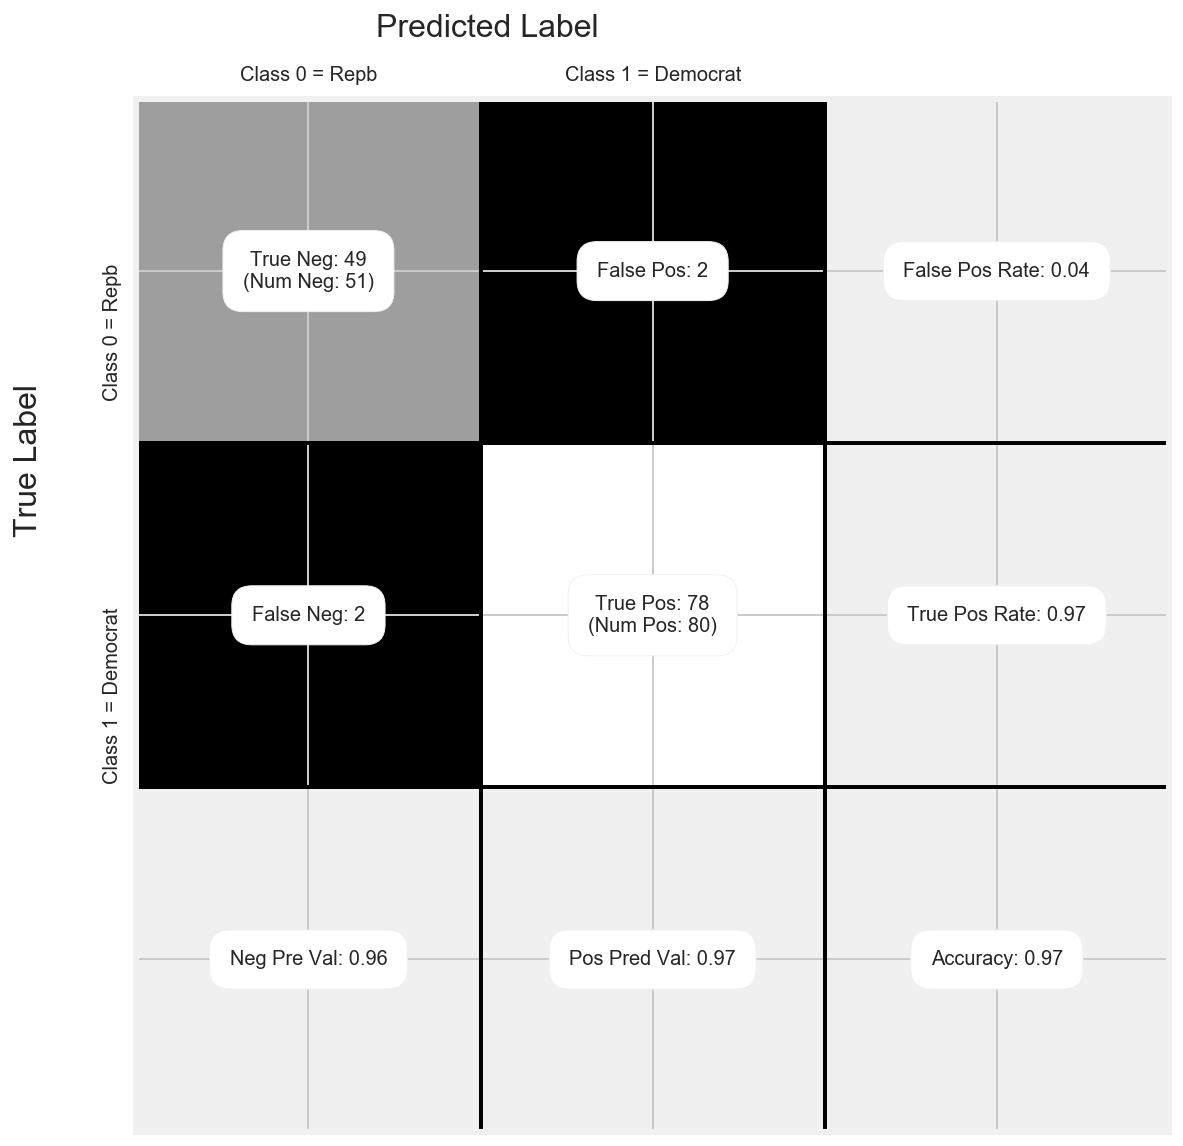

In [41]:
C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Repb', 'Class 1 = Democrat'])

# EVALUATION WITH ROC CURVE

- Receiving Operating Characteristic, or ROC, visual way to inspect the performance of a binary classifier (0/1)
- Compares the rate at which a classifier makes correct predictions (True Positives) and the rate at which a classifier makes false predictions (False Positives) 

    * **True Positive Rate** =  _TP_ / ( _TP_ + _FN_ )
    
    * **False Positive Rate** =  _FP_ / ( _FP_ + _TN_ )
$~$
- In a nutshell with a **ROC** curve we're measuring the trade off between the rate at which the model correctly predicts something, with the rate at which the model predicts something incorreclty (something that doesn't happen).
- As the class assignment threshold increases for the positive class, the false positive rate and true positive rate necessarily increase.

---

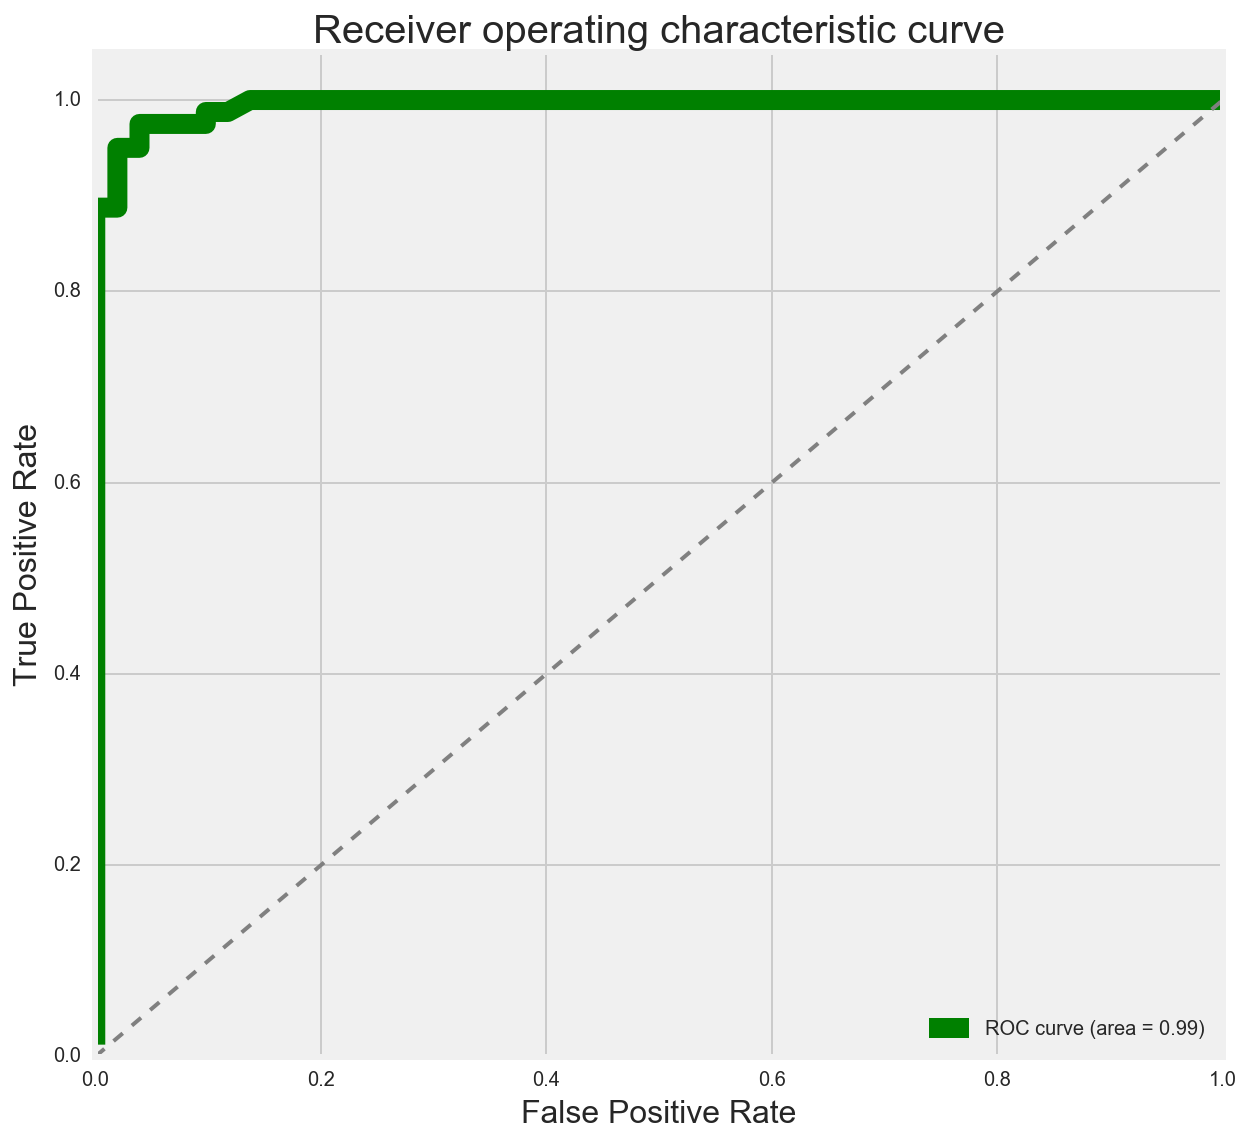

In [49]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

---

### ROC - Relevant classification metrics

This reference table describes some of the important metrics displayed in the visual below.

|   |   |
|---|---|
|**TPR/RECALL**    | The true positive rate, also known as the **sensitivity** or **recall**. It is the ability of the classifier to correctly identify a class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class.  0 means the classifier predicted all observations of the current class incorrectly.|
|**FPR** | The false positive rate is the percent of times model predicts 1 when the class is 0. This is the x-axis on the ROC curve.<br><br> `fpr = fp / (tn + fp)`<br><br>|
|**PRECISION** | The ability of the classifier to avoid labeling a class as a member of another class. <br><br> `Precision = True Positives / (True Positives + False Positives)`<br><br>_A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class.  precision score of 0 would mean that the classifier misclassified every instance of the current class_ |
|**RECALL**    | The ability of the classifier to correctly identify the current class. <br><br>`Recall = True Positives / (True Positives + False Negatives)`<br><br>A recall of 1 indicates that the classifier correctly predicted all observations of the class.  0 means the classifier predicted all observations of the current class incorrectly.|
|**AUC** | The area under the curve: this can refer to either the ROC curve or the precision-recall curve. In the case of the ROC curve, an area of 0.50 is the baseline, meaning this is the area under the curve when the classifier would be predicting at chance. An AUC of 1.0 is a perfect model, where the classifier never makes a mistake. <br><br>|

# EXAMPLES OF ROC CURVES
---
![](https://snag.gy/VTXdhF.jpg)
- A diagonal line shows that the classifier is making completely random guesses (50/50 chance).

![](https://snag.gy/M7Crfp.jpg)
- A perfect classifier is the one that shows a perfect trade-off between TPR and FPR (graphically TPR of 1 and FPR of 0)

*Images from Yhat*


### 5.3 Logisitic Regression - Evaluation with ROC curve
---
![](https://snag.gy/DyZEIh.jpg)
- Worse than guessing = the blue line is below the dotted line.

![](https://snag.gy/oBkjlv.jpg)
- Mediocre classifier = lines that show dips 

![](https://snag.gy/TbV0HU.jpg)
- Good Classifier = the ideal escenario where there is a 'hump shaped' curve that is continually increasing

*Images from Yhat*

### 5.4 Logisitic Regression - Area Under the Curve AUC
---
* Is the amout of space underneath the ROC curve, it shows how well your TPR and FPR is looking in the aggregate.
* The greater the area under the curve, the better higher the quality of the model
* The greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient
    * AUC = 0, BAD
    * AUS = 1, GOOD
    
![](https://snag.gy/8sLpV6.jpg)

*Images from Yhat*